In [26]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import plotly.express as px

In [27]:
# Carregando o dataset

data = pd.read_csv('/kc_house_data.csv')

print( data.columns) # aqui eu verifico todas as colunas do dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [28]:
# Vamos garantir que o formato date é um datetime

data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

# 1. Crie uma nova coluna chamada: “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’.


In [29]:
data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else
                                                           'apartament' if x == 2 else 
                                                           'house' if x > 2 else 'NA' )
        


In [30]:
# Verifindo se a coluna foi criada corretamente

data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartament
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


# 1.1. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [31]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')


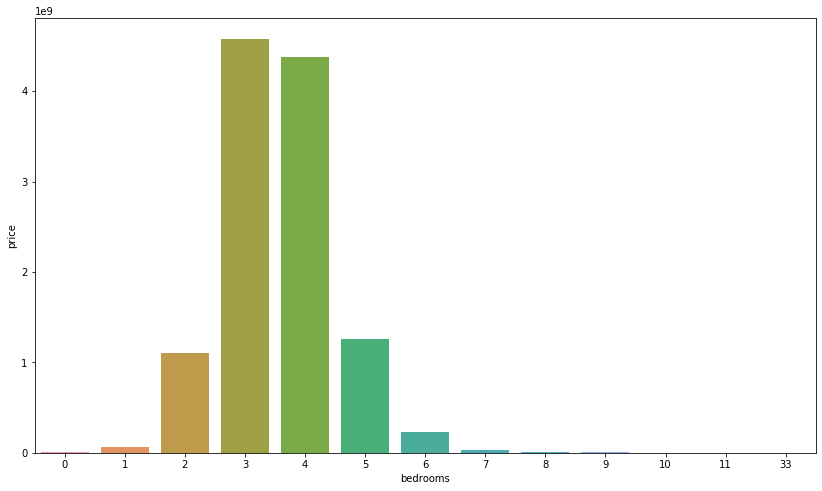

In [32]:
# Sempre atento a: qual a operação (no caso é soma) e qual o filtro ( no caso numero de quartos).

# melhorando o tamanho do gráfico
plt.figure( figsize=(14, 8))


df = data[['price', 'bedrooms']]. groupby( 'bedrooms' ).sum().reset_index()

# Usando a lib seaborn

sns.barplot( x='bedrooms', y='price', data=df)

# 1.2. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [33]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')


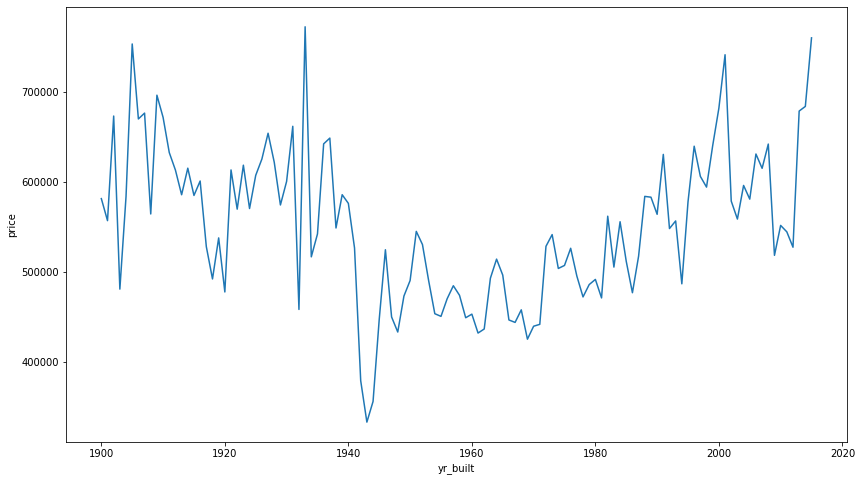

In [34]:
plt.figure( figsize=(14,8))
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=df);

# 1.3. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [35]:
# Verificando com o data.columns sempre depois de usar o groupby, entendi que depois q uso o grupby, meu datase passa a 
# ter apensas as colunas que estão no gropuby e não mais todas as colunas como no início.


print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')


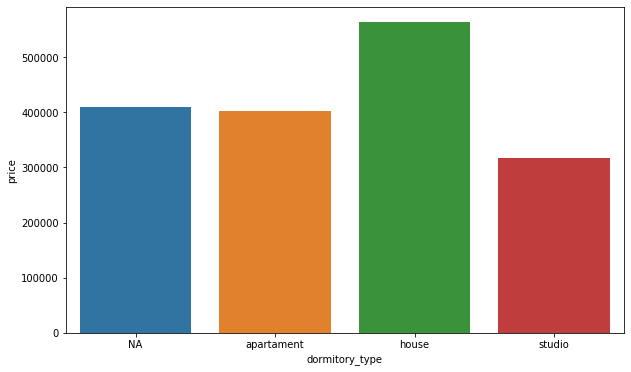

In [36]:
plt.figure( figsize=(10,6))

df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()

sns.barplot( x='dormitory_type', y='price', data=df );

# 1.4. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


In [37]:
data[ 'yr_renovated'].head()

0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64

In [38]:
data.loc[data[ 'yr_renovated'] > 0, 'yr_renovated'].min()

data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()

,yr_renovated,price
0,1934,459950.000000
1,1940,378400.000000
2,1944,521000.000000
3,1945,398666.666667
4,1946,351137.500000
...,...,...
64,2011,607496.153846
65,2012,625181.818182
66,2013,664663.513514
67,2014,654756.252747


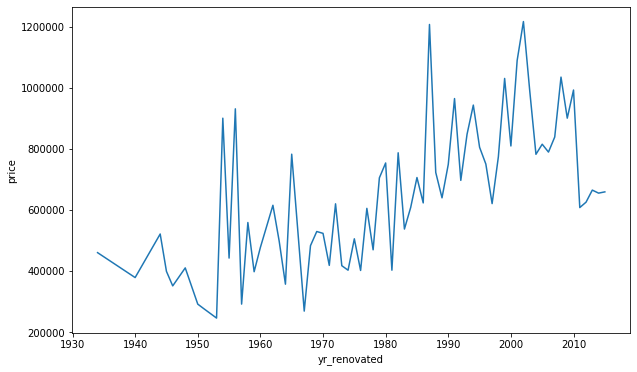

In [39]:
# Fazedno o gráfico

plt.figure( figsize=(10,6))

df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()

sns.lineplot( x='yr_renovated', y='price', data = df)

# 1.5. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [40]:
# Resolvendo passo a passo

data[['price', 'dormitory_type' ]].head()

,price,dormitory_type
0,221900.0,house
1,538000.0,house
2,180000.0,apartament
3,604000.0,house
4,510000.0,house


In [41]:
data[['price', 'dormitory_type' ]].groupby( 'dormitory_type' ).mean()

,price
dormitory_type,
NA,409503.846154
apartament,401372.681884
house,563092.211899
studio,317642.884422


In [42]:
data[['price', 'dormitory_type' ]].groupby( 'dormitory_type' ).mean().reset_index()

,dormitory_type,price
0,NA,409503.846154
1,apartament,401372.681884
2,house,563092.211899
3,studio,317642.884422


# 1.6. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 Linha e 2 colunas).


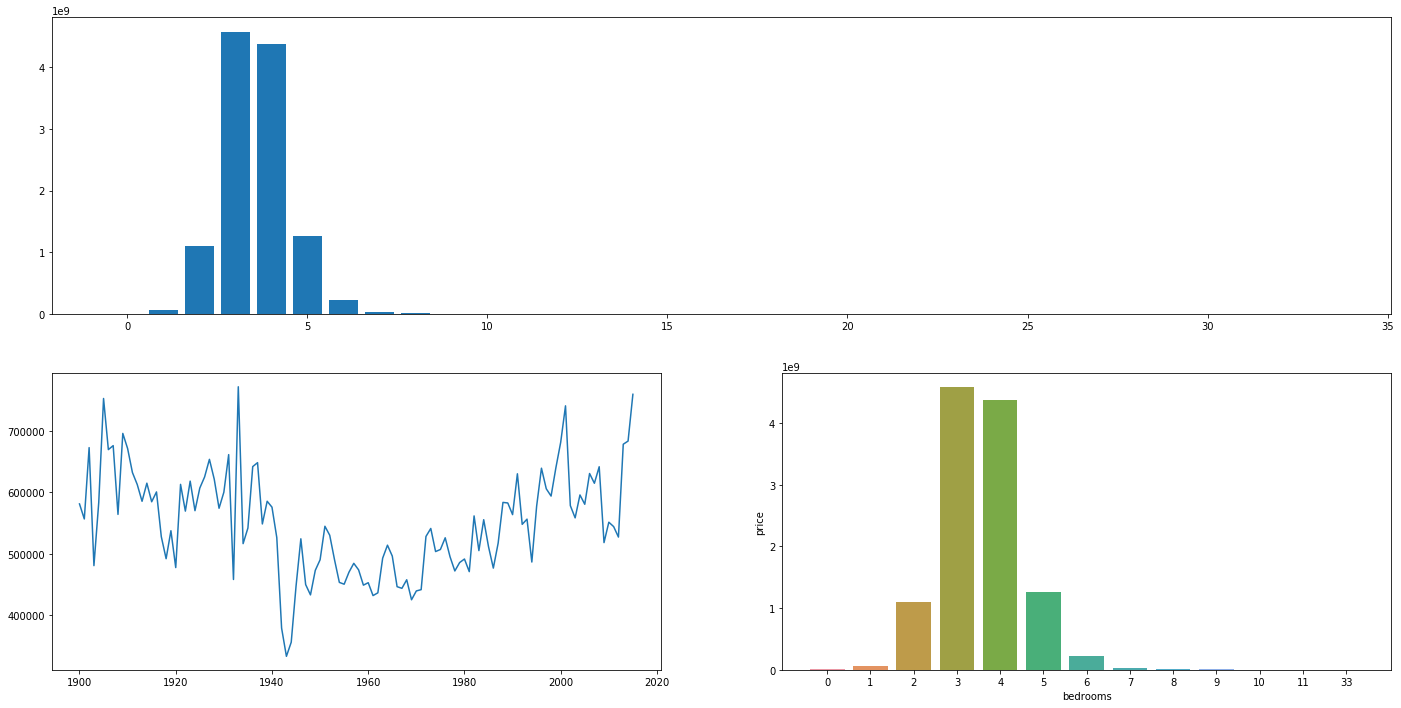

In [43]:
from matplotlib import gridspec

fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] ) # primeira linha
ax2 = fig.add_subplot( specs[1, 0] ) # segunda linha e primeira coluna
ax3 = fig.add_subplot( specs[1, 1] ) # seguunda linha

# Primeiro gráfico

df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );
ax1.bar( df['bedrooms'], df['price'] );

# Segundo gráfico
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax2.plot( df['yr_built'], df['price'] );

# Terceiro gráfico
df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
ax3.bar( df['dormitory_type'], df['price'] );

# 1.7. Crie um Dashboard com os gráficos das perguntas 02, 04 (Dashboard: 2 colunas).

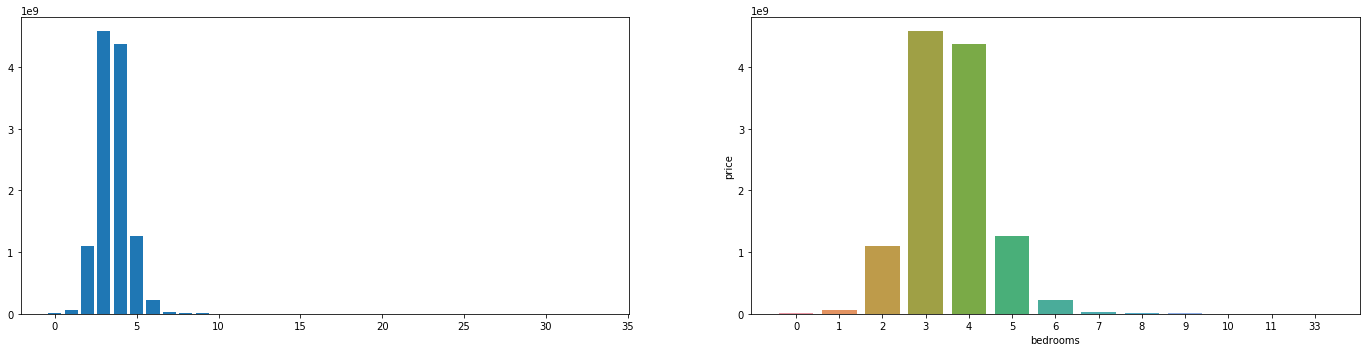

In [44]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # primeira linha e primeira coluna
ax2 = fig.add_subplot( specs[0, 1] ) # primeira linha e segunda coluna

# Primeiro gráfico
df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

sns.barplot( x='bedrooms', y='price', data=df );

ax1.bar( df['bedrooms'], df['price'] )


# Segundo gráfico
df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()

ax2.bar( df['dormitory_type'], df['price'] );

# 1.8. Crie um Dashboard com os gráficos das perguntas 03, 05 (Dashboard: 2 linhas).

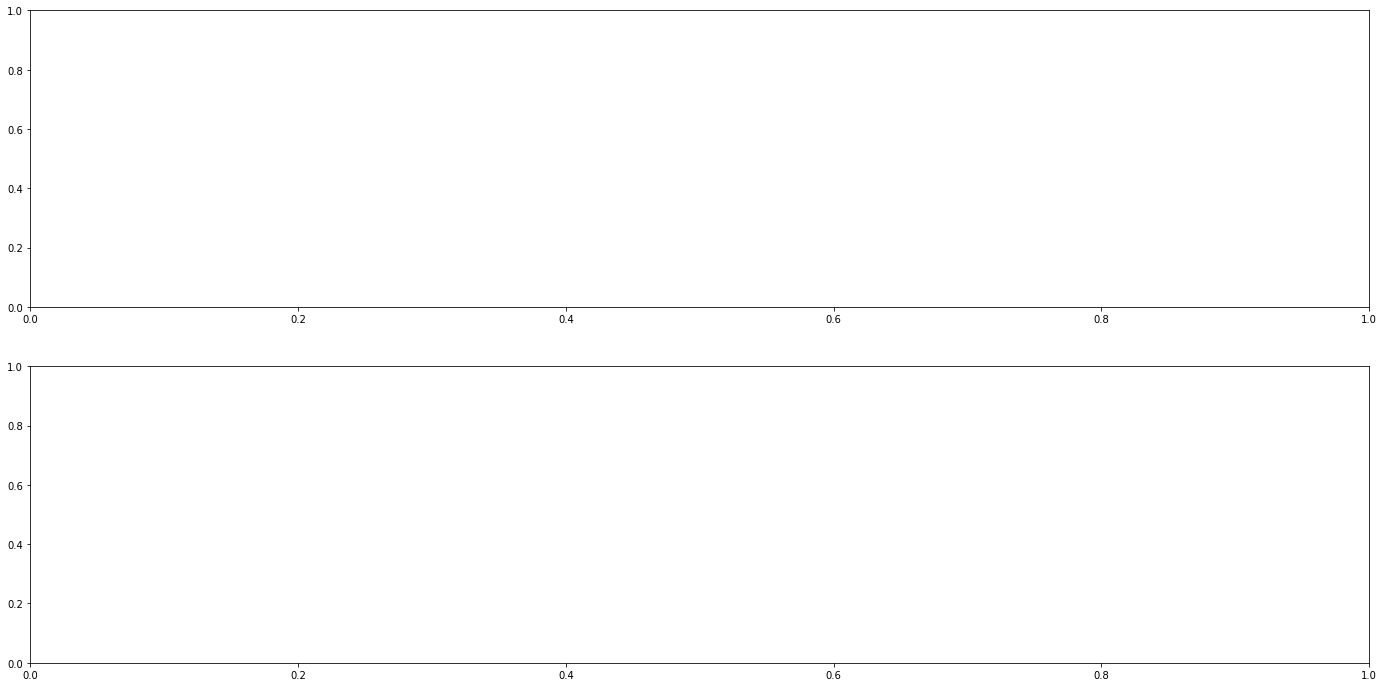

In [45]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # primeira linha e primeira coluna
ax2 = fig.add_subplot( specs[1, 0] ) # segunda linha e primeira coluna

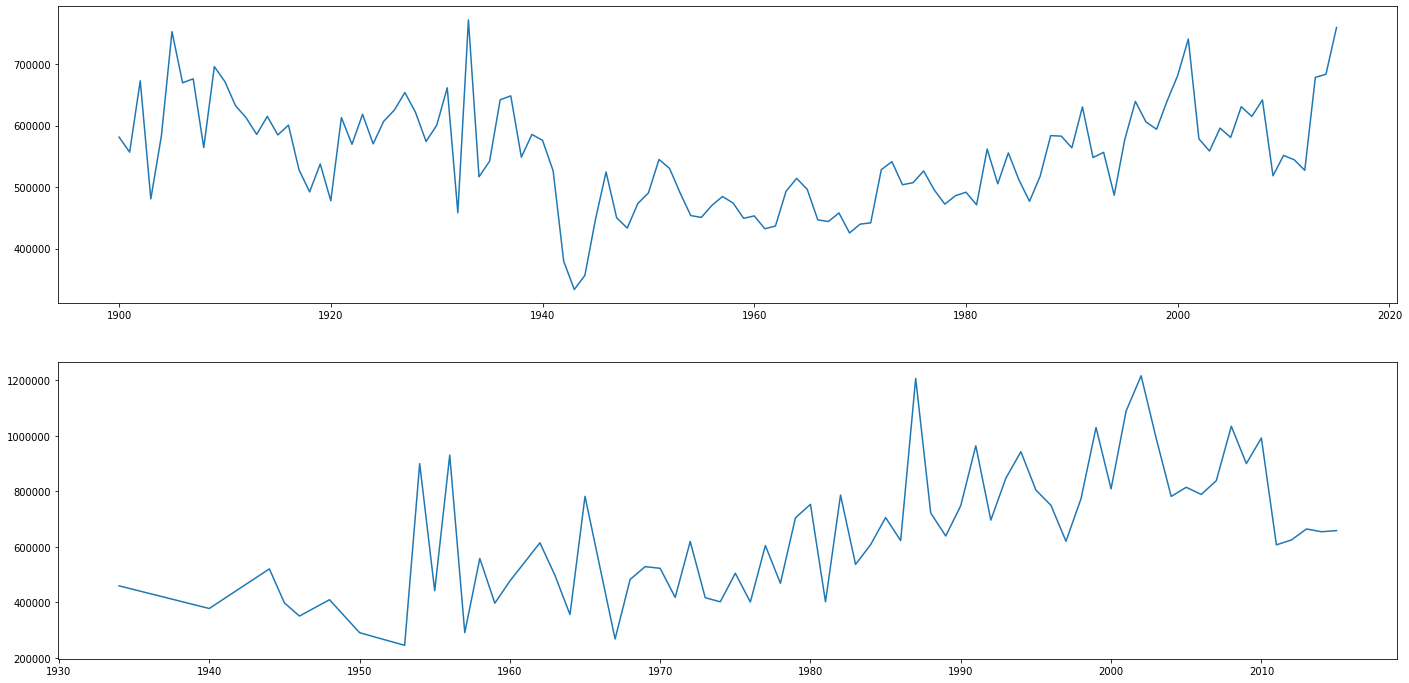

In [46]:
# Plotando os gráficos 

fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # primeira linha e primeira coluna
ax2 = fig.add_subplot( specs[1, 0] ) # segunda linha e primeira coluna

# Primeiro gráfico
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax1.plot( df['yr_built'], df['price'] );

# Segundo gráfico
df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()
ax2.plot( df['yr_renovated'], df['price'] );

# 1.9. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [47]:
houses = data[['id', 'lat', 'long', 'price', 'sqft_living' ]].copy()

fig = px.scatter_mapbox( houses,
                         lat='lat',
                         lon='long',
                         size='sqft_living',
                         color_continuous_scale=px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()